データオーグメンてションを理解しよう
参考サイト：
https://github.com/aidiary/keras-examples/blob/master/datagen/test_datagen2.py

In [0]:
import os
import shutil
import numpy as np
from scipy.misc import toimage
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator


In [0]:
# CIFAR-10データをロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
def draw_imgs(X):
    plt.figure()
    pos = 1
    for i in range(X.shape[0]):
        plt.subplot(4, 4, pos)
        img = toimage(X[i])
        plt.imshow(img)
        plt.axis('off')
        pos += 1

In [0]:

img_rows, img_cols, img_channels = 32, 32, 3
batch_size = 16
nb_classes = 10


# 画素値を0-1に変換
X_train = X_train.astype('float32')
X_train /= 255.0


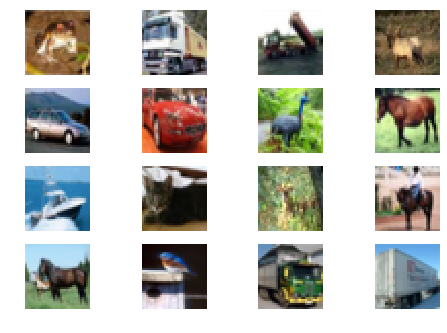

In [79]:

# 元データ
draw_imgs(X_train[0:batch_size])

In [0]:
# 全データのの平均を0に正規化
# データの分布が偏ってる時は使えるかも？
datagen_fwcenter = ImageDataGenerator(featurewise_center=True)

datagen_fwcenter.fit(X_train)
g_fwcenter = datagen_fwcenter.flow(X_train, y_train, batch_size, shuffle=False)


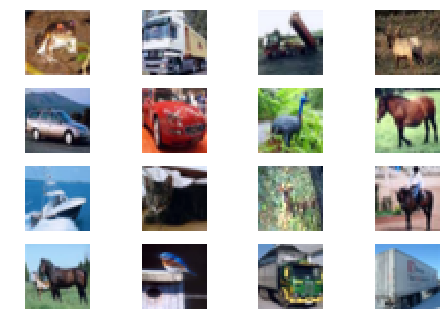

In [81]:
X_batch, y_batch = g_fwcenter.next()
draw_imgs(X_batch)

In [45]:
print(np.amax(X_train[0,:,:,:]))
print(np.amax(X_batch[0,:,:,:]))
print(np.amin(X_train[0,:,:,:]))
print(np.amin(X_batch[0,:,:,:]))
# 変わってるね


1.0
0.5099979
0.0
-0.4914009


In [0]:
# samplewise_center 各サンプルの平均を0に正規化
# 毎回の写真で光の当たり方や明るさが違う場合のデータを使いたいならこれがいいかも。
datagen_swcenter = ImageDataGenerator(samplewise_center=True)

datagen_swcenter.fit(X_train)
g_swcenter = datagen_swcenter.flow(X_train, y_train, batch_size, shuffle=False)


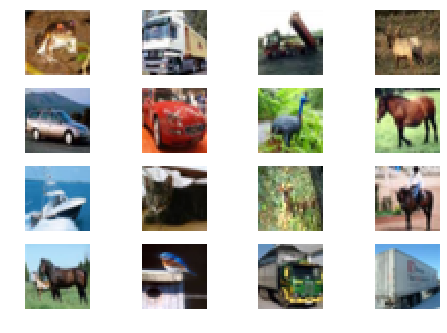

In [47]:
X_batch, y_batch = g_swcenter.next()
draw_imgs(X_batch)

In [53]:
print(np.amax(X_train[0,:,:,:]))
print(np.amax(X_batch[0,:,:,:]))
print(np.amin(X_train[0,:,:,:]))
print(np.amin(X_batch[0,:,:,:]))
# 変わってるね

1.0
0.59432447
0.0
-0.40567556


/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:657: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


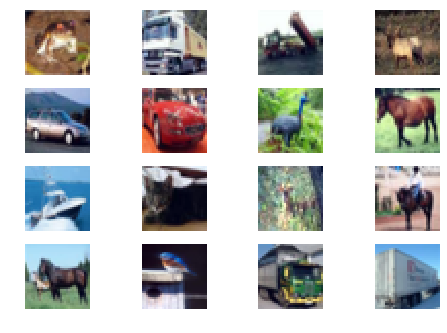

In [55]:
# featurewise_std_normalization
datagen = ImageDataGenerator(featurewise_std_normalization=True)

datagen.fit(X_train)
g = datagen.flow(X_train, y_train, batch_size, shuffle=False)
X_batch, y_batch = g.next()
draw_imgs(X_batch)

/usr/local/lib/python3.6/dist-packages/keras/preprocessing/image.py:645: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


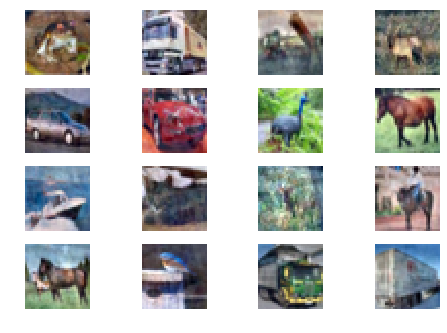

In [56]:
# 白色化（無相間化）
datagen_zca = ImageDataGenerator(zca_whitening=True)

datagen_zca.fit(X_train[0:batch_size])
g = datagen_zca.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

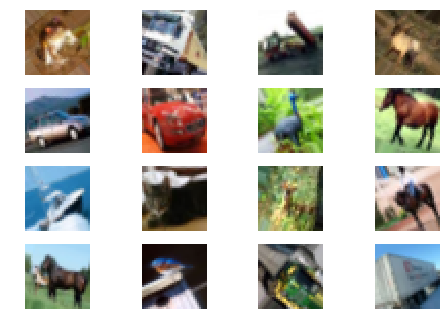

In [91]:
# rotation_range　指定した範囲内の角度でランダムに回転
datagen = ImageDataGenerator(rotation_range=45)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

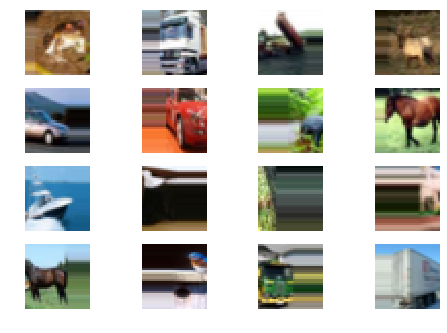

In [92]:
# width_shift_range　横幅に対する割合を指定してその範囲内でランダムに水平シフト
# 伸び切った部分は端の値を伸ばすみたい
datagen = ImageDataGenerator(width_shift_range=0.8)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

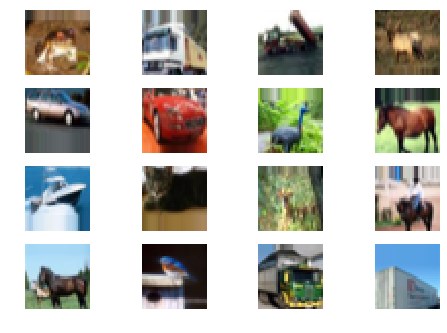

In [64]:
# height_shift_range
datagen = ImageDataGenerator(height_shift_range=0.3)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

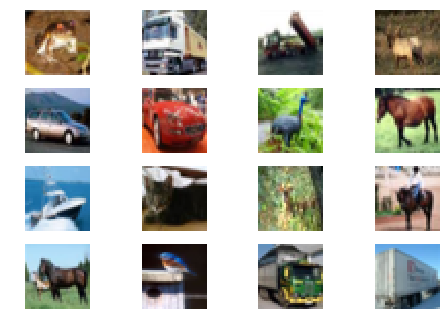

In [73]:
# shear_range
# なんか作動してないっぽい
datagen = ImageDataGenerator(shear_range=0.8)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

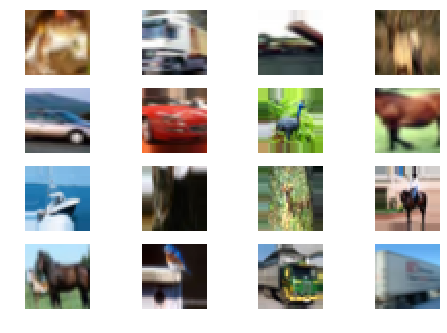

In [75]:
# zoom_range
# ズームの仕方は縦横比率が違う
datagen = ImageDataGenerator(zoom_range=0.5)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

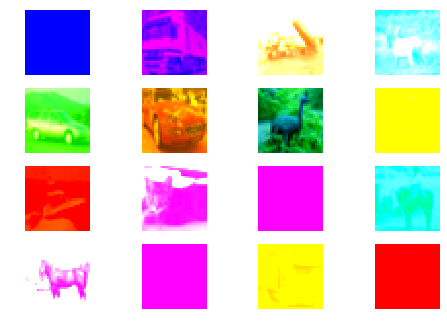

In [78]:
# channel_shift_range
# あまり使う機会ないかも？
datagen = ImageDataGenerator(channel_shift_range=2)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

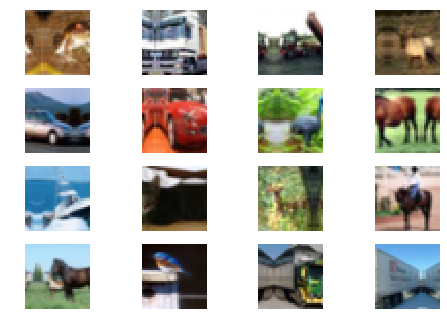

In [83]:
# fill_mode reflect
# シフトなどでずれた部分をどう処理するか決定できる
datagen = ImageDataGenerator(width_shift_range=0.3, fill_mode='reflect')

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

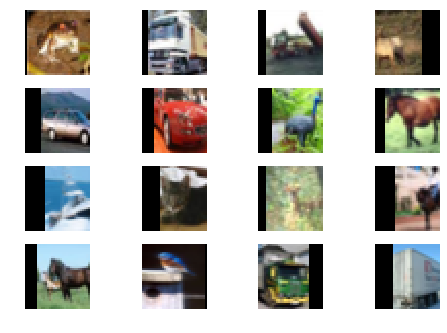

In [84]:
# fill_mode constant
# シフトなどでずれた部分をどう処理するか決定できる
datagen = ImageDataGenerator(width_shift_range=0.3, fill_mode='constant')

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

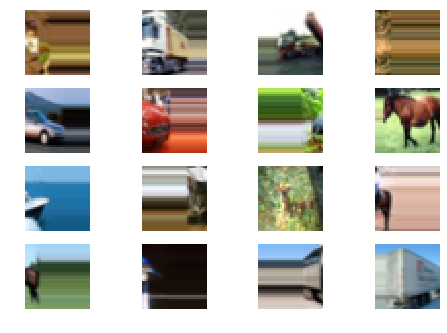

In [86]:
# fill_mode nearest
# シフトなどでずれた部分をどう処理するか決定できる
# デフォルトはこれっぽい
datagen = ImageDataGenerator(width_shift_range=0.8, fill_mode='nearest')

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

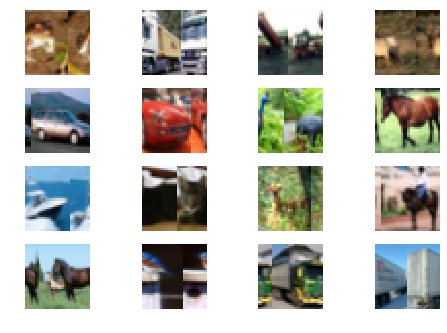

In [87]:
# fill_mode wrap
# シフトなどでずれた部分をどう処理するか決定できる
datagen = ImageDataGenerator(width_shift_range=0.8, fill_mode='wrap')

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

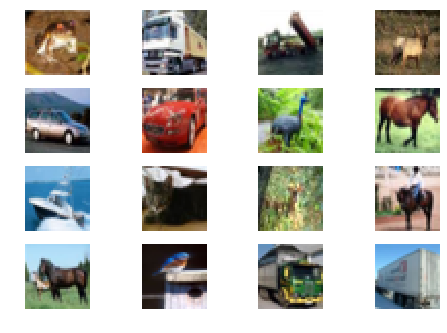

In [88]:

# horizontal_flip
datagen = ImageDataGenerator(horizontal_flip = True)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)

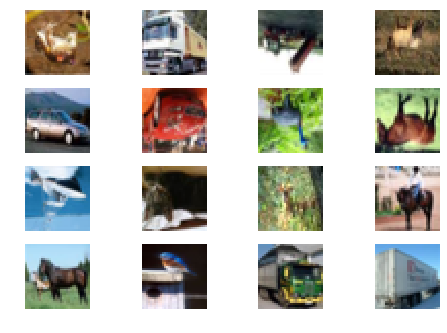

In [89]:

# vertical_flip
datagen = ImageDataGenerator(vertical_flip = True)

datagen.fit(X_train[0:batch_size])
g = datagen.flow(X_train[0:batch_size], y_train[0:batch_size], batch_size, shuffle=False)

X_batch, y_batch = g.next()
draw_imgs(X_batch)